# Unveiling Patterns in Road Collision using Dimensionality Reduction Techniques

- Full name: **Tam Nguyen Bang**
- Student ID: **475308**

- *1st Year Master's Student of Data Science and Business Analytics*

- *Faculty of Economic Sciences, University of Warsaw*

# Table of content

1. Project motivation
* Required libraries
2. Dataset information
* Handling missing and duplicate values
3. Exploratory Data Analysis (EDA)
4. Cleaning and transforming the data
5. Correlation matrix analysis
6. Clustering
7. Dimensionality reduction using PCA
8. Conclusion
9. References

# Project motivation

## Literature Review

The analysis of road collision data has become increasingly critical as policymakers and researchers strive to enhance public safety. Road collisions result in significant human, social, and economic costs globally, emphasizing the need for actionable insights to prevent accidents and improve road safety. Dimensionality reduction techniques have proven to be essential tools for simplifying complex datasets, enabling meaningful insights and actionable conclusions. Principal Component Analysis (PCA), developed by Pearson in 1901, is a cornerstone of dimensionality reduction. By transforming data into orthogonal components, PCA captures the largest variance in the first few dimensions, facilitating both interpretation and visualization (Jolliffe, 2011).

The integration of clustering algorithms, such as KMeans, with dimensionality reduction methods amplifies their effectiveness. KMeans clustering partitions data into distinct groups, revealing latent structures within datasets. Studies in traffic data analysis, including those by Xu and Wunsch (2009), demonstrate the value of combining PCA with KMeans to uncover meaningful clusters that might otherwise remain hidden.

In the context of road collision data, these methods are invaluable. By reducing dimensions and clustering data, researchers can identify patterns related to collision hotspots, vehicle involvement, and contributing factors. Such insights play a pivotal role in guiding interventions and policymaking aimed at reducing road traffic accidents and enhancing safety measures.

## Executive Summary

This project, Unveiling Patterns in Road Collisions Using Dimensionality Reduction Techniques, is driven by the pressing need to address the growing toll of road collisions. Traffic accidents not only result in loss of life and injuries but also impose economic and emotional burdens on individuals and societies. The ability to uncover hidden patterns in collision data can directly support initiatives to make roads safer and prevent future accidents.
This project underscores the value of combining dimensionality reduction and clustering techniques in analyzing large and complex datasets. The findings contribute to a deeper understanding of road collision dynamics, providing a foundation for targeted interventions and evidence-based policymaking aimed at improving road safety.

## Required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
file_path = "/content/jan-dec-2023-gla-data-extract-vehicle.csv"
data = pd.read_csv(file_path)

## Dataset information

The dataset used in this project from *transportforlondon.gov* consists of 41,507 entries and 21 columns, providing a comprehensive overview of road collisions. Each entry represents a unique collision, with attributes ranging from location details to vehicle and driver information. Key columns include:

* Collision Id: A unique identifier for each collision.
* Collision Date: The date and time of the collision.
* Borough Name and Borough Number: The geographic location of the collision within London, categorized by boroughs.
* Easting and Northing: Coordinates specifying the collision's location.
* Vehicle Attributes: Including Vehicle Type, Vehicle Manoeuvres, and Vehicle
* Skidding and Overturning, which provide insights into vehicle involvement and behavior during the collision.
* Driver Attributes: Including Driver Gender and Driver Age, which add demographic context to the dataset.

The dataset contains both numerical and categorical features, with some columns exhibiting missing values. For instance, Driver Age has missing entries for 10,360 records, and Vehicle Hit Object in Carriageway is only populated in 19,112 records. These gaps required careful preprocessing, such as filling missing numerical values with their mean, to ensure consistency in analysis.

The data's dimensionality and diversity make it suitable for applying dimensionality reduction techniques like PCA and clustering algorithms like KMeans. Together, these methods allow for efficient analysis and visualization of underlying patterns within the dataset.

The dataset can be easily access via this link: https://tfl.gov.uk/cdn/static/cms/documents/jan-dec-2023-gla-data-extract-vehicle.csv

In [ ]:
print("Dataset Info:")
data.info()
print("\nDataset Description:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41507 entries, 0 to 41506
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   _Collision Id                        41507 non-null  int64  
 1   _Collision Date                      41507 non-null  object 
 2   Borough Name                         41507 non-null  object 
 3   Borough Number                       41507 non-null  int64  
 4   Easting                              41507 non-null  int64  
 5   Northing                             41507 non-null  int64  
 6   _Vehicle Id                          41507 non-null  int64  
 7   Vehicle Type Banded                  41507 non-null  object 
 8   Vehicle Type                         41507 non-null  object 
 9   Vehicle Manoeuvres                   41507 non-null  object 
 10  Vehicle Skidding and Overturning     41507 non-null  object 
 11  Vehicle Restri

## Handling missing and duplicate values

In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())

print("\nDuplicate Rows:")
print(data.duplicated().sum())


Missing Values:
_Collision Id                              0
_Collision Date                            0
Borough Name                               0
Borough Number                             0
Easting                                    0
Northing                                   0
_Vehicle Id                                0
Vehicle Type Banded                        0
Vehicle Type                               0
Vehicle Manoeuvres                         0
Vehicle Skidding and Overturning           0
Vehicle Restricted Lane                    0
Location of Vehicle at First Impact        0
Vehicle Hit Object in Carriageway      22395
Vehicle Leaving Carriageway                0
Vehicle Hit Object Off Carriageway     23767
First Point of Impact                      0
Journey Purpose                            0
Driver Gender                              0
Driver Age                             10360
Driver age (Banded)                        0
dtype: int64

Duplicate Rows:
0


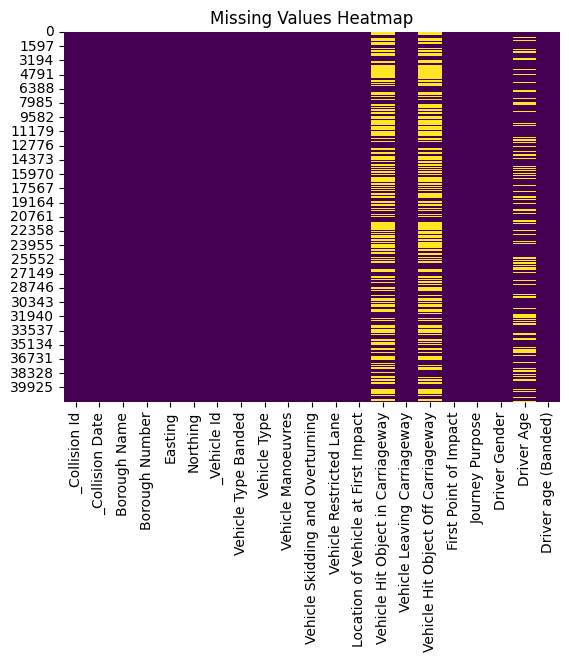

In [ ]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Exploratory Data Analysis (EDA)


Value counts for _Collision Date:
_Collision Date
26/05/2023 00:00    207
14/09/2023 00:00    193
08/06/2023 00:00    183
16/06/2023 00:00    180
06/06/2023 00:00    177
                   ... 
10/04/2023 00:00     54
26/03/2023 00:00     54
25/12/2023 00:00     48
26/12/2023 00:00     36
31/12/2023 00:00     36
Name: count, Length: 365, dtype: int64


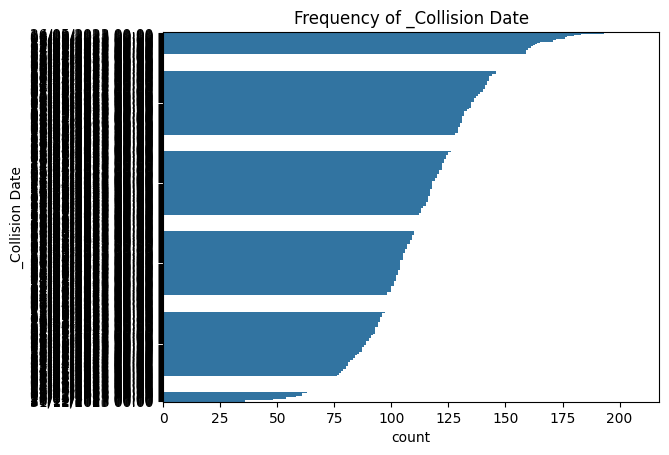


Value counts for Borough Name:
Borough Name
Westminster             2151
Croydon                 2026
Wandsworth              1927
Lambeth                 1877
Tower Hamlets           1855
Enfield                 1847
Southwark               1827
Haringey                1765
Brent                   1693
Ealing                  1586
Barnet                  1552
Newham                  1440
Lewisham                1401
Hackney                 1359
Camden                  1265
Hounslow                1208
Redbridge               1131
Kensington & Chelsea    1131
Hillingdon              1130
Greenwich               1101
Hammersmith & Fulham    1100
Bromley                 1093
Islington               1061
Waltham Forest           924
Havering                 921
Barking & Dagenham       833
Merton                   787
Bexley                   716
Richmond-Upon-Thames     675
Harrow                   671
Sutton                   665
Kingston-Upon-Thames     485
City Of London           30

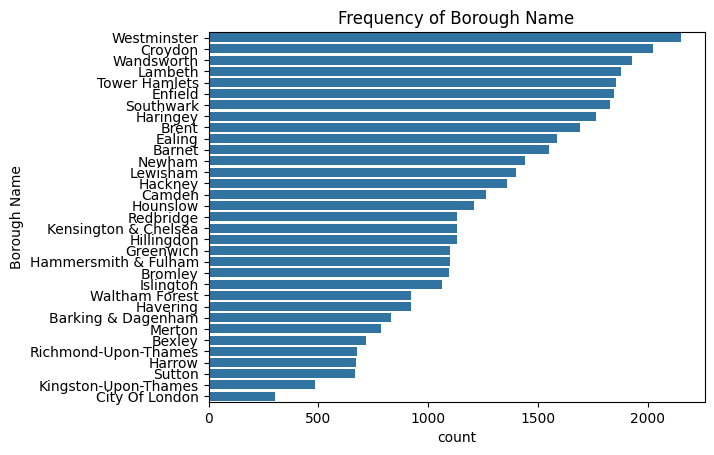


Value counts for Vehicle Type Banded:
Vehicle Type Banded
Car              22975
Motorcycle        7217
Pedal Cycle       5151
Goods Vehicle     2805
Bus Or Coach      1479
Taxi               807
Other Vehicle      597
Private Hire       476
Name: count, dtype: int64


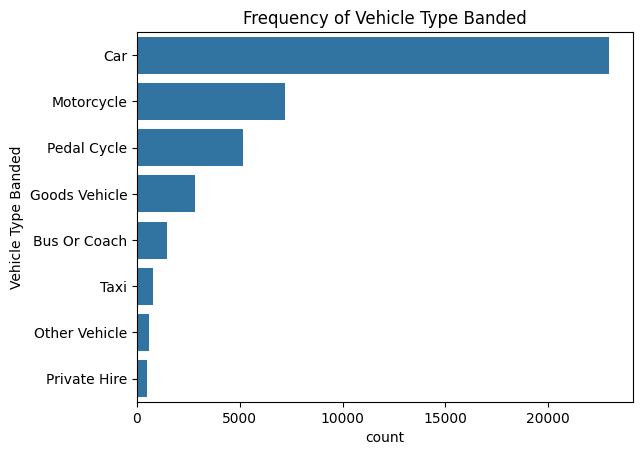


Value counts for Vehicle Type:
Vehicle Type
Car                          22975
M/C 50-125CC                  5220
Pedal Cycle                   5148
GDS =< 3.5T                   2252
London Bus                    1279
Taxi                           807
M/C > 500CC                    742
M/C 125-500CC                  649
Private Hire - Licensed        475
Other Vehicle                  471
M/C <= 50CC                    347
Goods Unknown kg (S/R)         213
Bus/Coach                      200
GDS => 7.5T                    187
M/C Unknown CC (S/R)           174
GDS 3.5-7.5T                   153
Minibus                         85
M/C Electric                    85
Mobility Scooter                31
Agric Veh                        8
Rickshaw                         3
Ridden Horse                     1
Private Hire - Unlicensed        1
Tram                             1
Name: count, dtype: int64


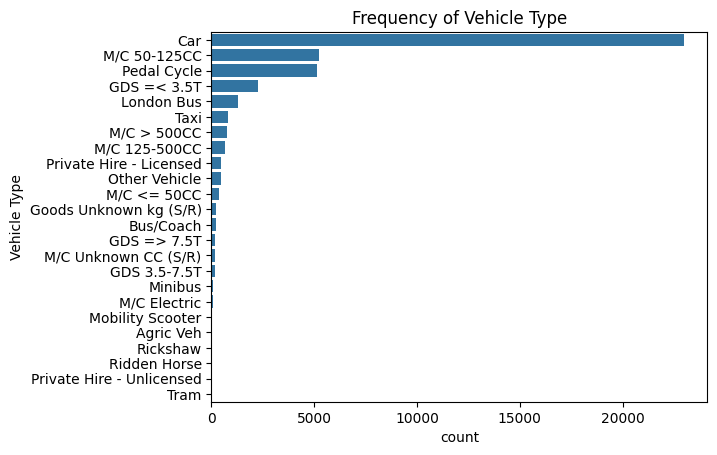


Value counts for Vehicle Manoeuvres:
Vehicle Manoeuvres
Unknown (S/R)             17132
Going Ahead Other         11021
Turning Right              2683
Moving Off                 1849
Slowing Or Stopping        1544
Parked                     1267
Going Ahead Held Up        1190
Turning Left               1173
Overtake Move Veh O/S       587
Overtake Stat Veh O/S       415
Going Ahead Right Bend      409
Overtaking Nearside         382
Going Ahead Left Bend       369
Waiting To Turn Right       352
U-turning                   339
Reversing                   314
Change Lane To Left         188
Change Lane To Right        163
Waiting To Turn Left        130
Name: count, dtype: int64


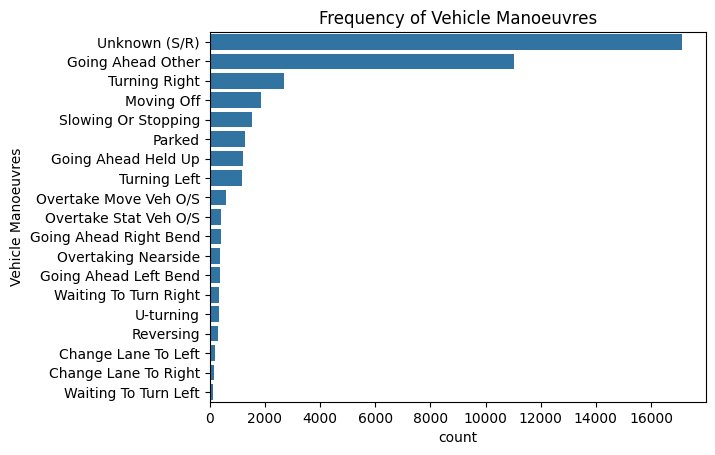


Value counts for Vehicle Skidding and Overturning:
Vehicle Skidding and Overturning
No Skidding/Overturn    22244
Unknown (S/R)           17220
Skidded                   982
Overturn                  680
Skid/Over                 380
J/KNF                       1
Name: count, dtype: int64


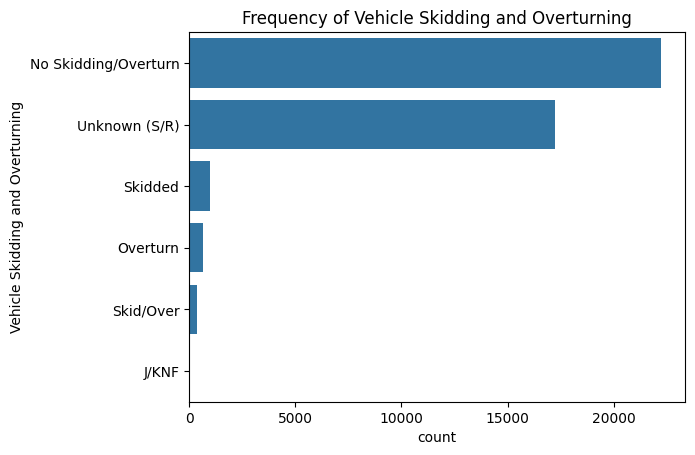


Value counts for Vehicle Restricted Lane:
Vehicle Restricted Lane
On Main CW - Not Rest.          22833
Unknown (S/R)                   16830
Footway                           676
Bus Lane                          521
Cycle Lane (On CWY)               342
Cycleway/Footway (Separated)      118
Lay-by/Hard Shldr                  84
Busway                             37
Leaving Lay-by/Hard Shldr          36
Entering Lay-by/Hard Shldr         29
Tram Track                          1
Name: count, dtype: int64


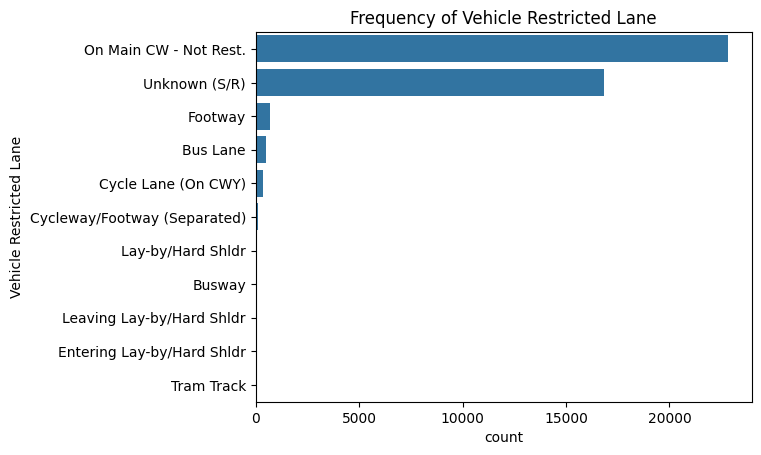


Value counts for Location of Vehicle at First Impact:
Location of Vehicle at First Impact
Unknown (S/R)         14431
Jct App                8739
Not At Jct             8494
Jct Mid                3850
Jct Cleared            2515
Entering Main Rd       1270
Leaving Main Rd         984
Entering R'about        600
Leaving R'about         483
Entering From Slip      141
Name: count, dtype: int64


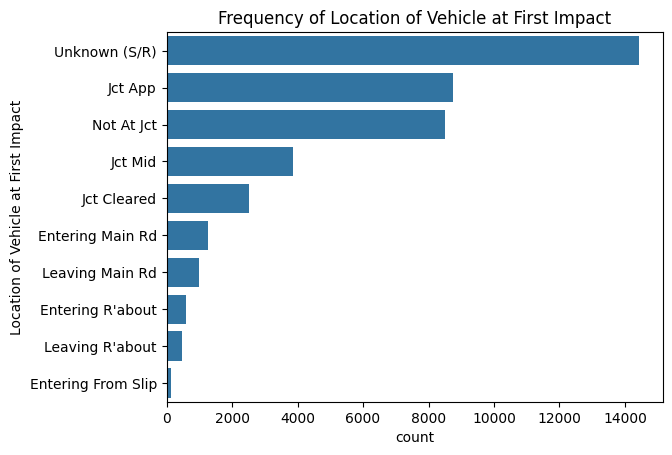


Value counts for Vehicle Hit Object in Carriageway:
Vehicle Hit Object in Carriageway
Unknown (S/R)                 17126
Hit Parked Veh                  899
Hit Kerb                        541
Hit Oth Object                  181
Hit Bollard                     180
Hit Open Door                   104
Hit Animal (Not Rid-horse)       29
Hit Prev Acc                     19
Hit Roundabout                   16
Hit Brdg Side                     7
Hit Road Works                    5
Hit Brdg Roof                     5
Name: count, dtype: int64


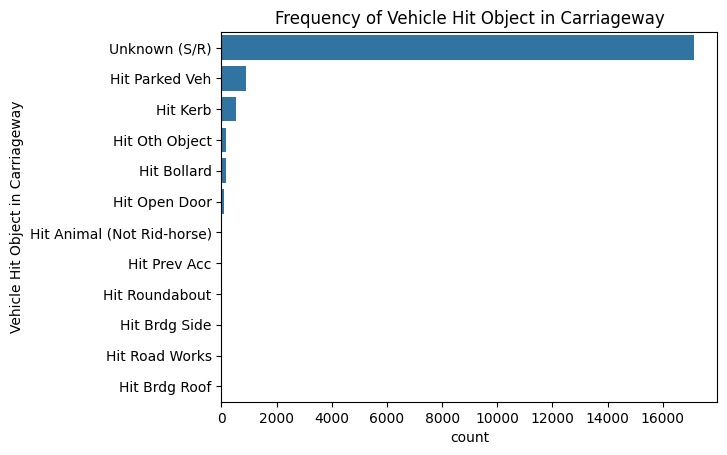


Value counts for Vehicle Leaving Carriageway:
Vehicle Leaving Carriageway
Did Not Leave                22763
Unknown (S/R)                17029
Left Cwy Nearside              965
Left Cwy Offside               438
Left Cwy Ahead At Junctn       154
Left Cwy Nearside/Rebound       76
Left Cwy Onto Central Res       34
Left Cwy Offside/Rebound        30
Left Cwy Cross Cent/Res         11
Left Cwy Onto Res/Rebound        7
Name: count, dtype: int64


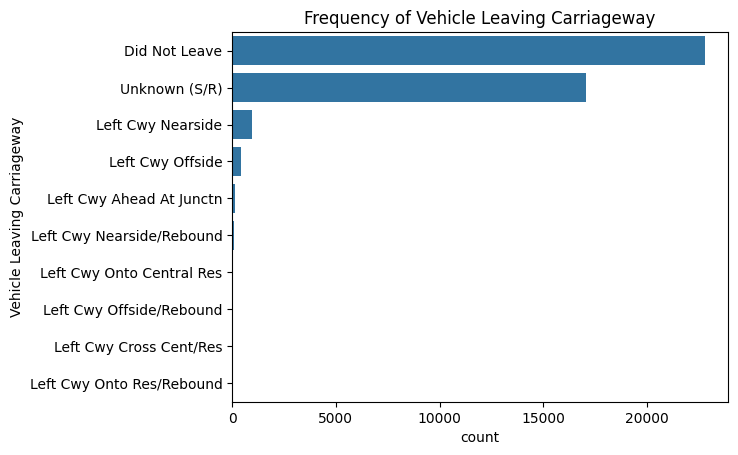


Value counts for Vehicle Hit Object Off Carriageway:
Vehicle Hit Object Off Carriageway
Unknown (S/R)      16904
Wall Or Fence        258
Hit Oth Object       164
Hit Lamp Post        144
Hit Rd Sign/Ats       93
Hit Tree              71
Hit Nr/Off Bar        43
Hit Central Bar       19
Hit Telegraph         19
Hit Bus Stop          18
Entered Ditch          7
Name: count, dtype: int64


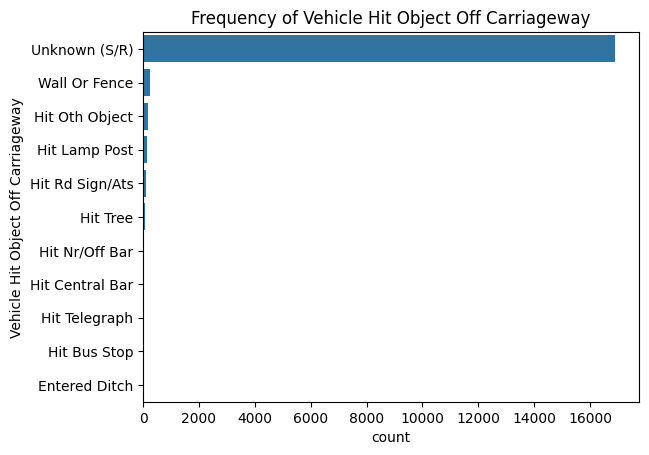


Value counts for First Point of Impact:
First Point of Impact
Front Hit First    18596
Unknown (S/R)       8124
Back Hit First      5781
O/S Hit First       3287
N/S Hit First       3238
Did Not Impact      2481
Name: count, dtype: int64


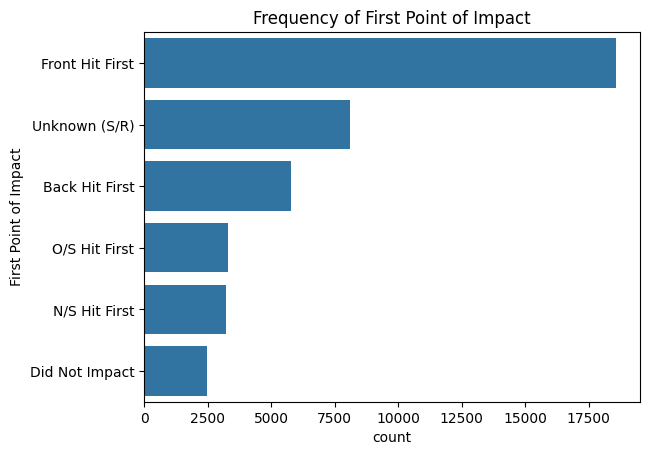


Value counts for Journey Purpose:
Journey Purpose
Unknown                     18142
Other/Not Known             11189
Jny Part Of Work             6807
Comm To/From Work            4944
Taking Pupil To/From Sch      352
Pupil Riding To/From Sch       73
Name: count, dtype: int64


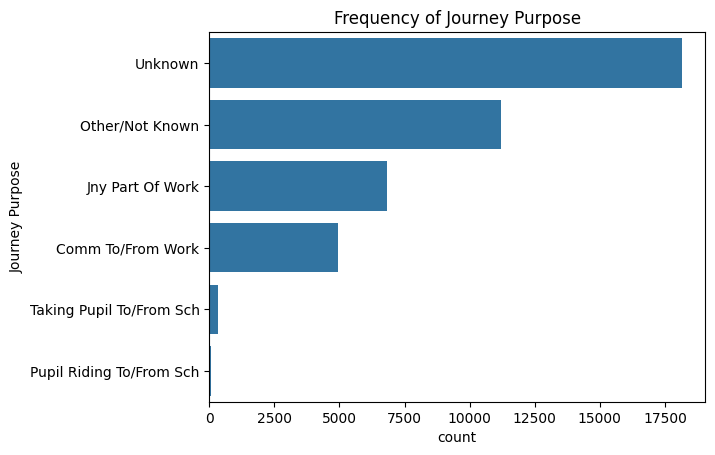


Value counts for Driver Gender:
Driver Gender
Male          23565
Not Traced    10952
Female         6990
Name: count, dtype: int64


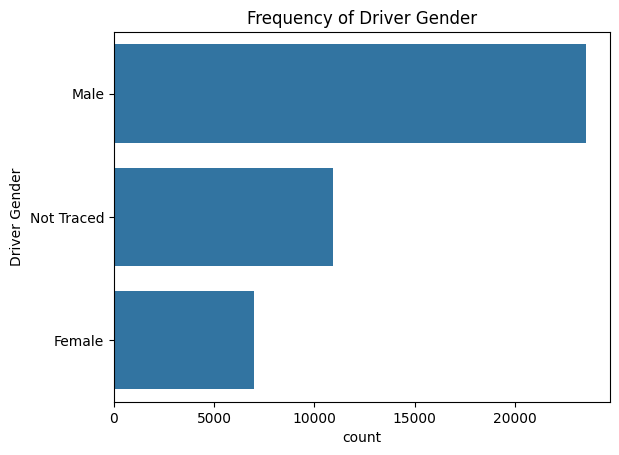


Value counts for Driver age (Banded):
Driver age (Banded)
35-64      15493
Unknown    10360
25-34       9167
17-24       4698
65+         1540
0-16         249
Name: count, dtype: int64


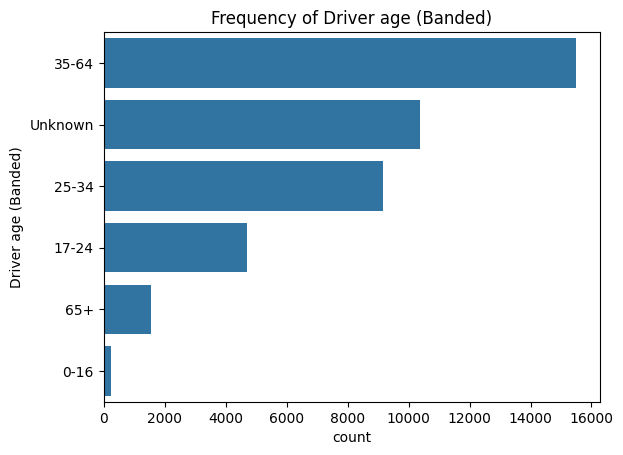

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\nValue counts for {column}:")
    print(data[column].value_counts())
    sns.countplot(y=column, data=data, order=data[column].value_counts().index)
    plt.title(f"Frequency of {column}")
    plt.show()

As from the above graphs, it is observed that:

1. **Borough Name Frequency**:
   - The graph highlights that boroughs like Westminster, Croydon, and Wandsworth report the highest number of collisions, suggesting these areas may require targeted interventions or deeper investigation into collision causes.
   - Boroughs with fewer collisions, such as the City of London and Kingston-Upon-Thames, indicate either lower traffic density or effective safety measures.

2. **Vehicle Type Banded**:
   - Cars are overwhelmingly involved in the majority of collisions, followed by motorcycles and pedal cycles.
   - The smaller frequency of collisions involving buses, taxis, and private hire vehicles may reflect their operational regulations or restricted traffic zones.

3. **Vehicle Manoeuvres**:
   - A significant number of vehicle manoeuvres are labeled as unknown, indicating gaps in data collection or reporting.
   - Among identifiable manoeuvres, “Going Ahead Other” and “Turning Right” are frequent, reflecting common scenarios that may lead to collisions.

4. **Vehicle Skidding and Overturning**:
   - The majority of incidents do not involve skidding or overturning, but the high count of unknown entries limits clear conclusions.
   - Skidding and overturning incidents, though less frequent, may point to specific road conditions or driver behaviors requiring attention.

5. **Vehicle Restricted Lane**:
   - Most collisions occurred on main carriageways, with few incidents involving cycle lanes, bus lanes, or tram tracks.
   - A high count of unknown entries suggests incomplete reporting on restricted lane usage.

6. **Location of Vehicle at First Impact**:
   - The majority of collisions occurred in unknown locations, followed by junction approaches and non-junction areas.
   - Collisions at junctions highlight areas that might benefit from improved traffic management or visibility enhancements.

7. **Vehicle Leaving Carriageway**:
   - Most vehicles did not leave the carriageway, but there are cases of vehicles leaving onto nearside or offside areas, possibly indicating issues with road design or driver error.

8. **First Point of Impact**:
   - “Front Hit First” dominates the data, which aligns with head-on collisions being a common scenario.
   - Unknown points of impact reduce the clarity of conclusions, but back and side impacts also warrant further analysis.

9. **Journey Purpose**:
   - Unknown journey purposes make up the largest category, reflecting incomplete data.
   - Work-related journeys show a notable proportion of collisions, suggesting potential patterns linked to commuting times.

10. **Driver Gender**:
    - Males are most frequently involved in collisions, followed by unknown entries, and then females.
    - This may reflect driving demographics or behavioral patterns that could be addressed through targeted education or awareness campaigns.

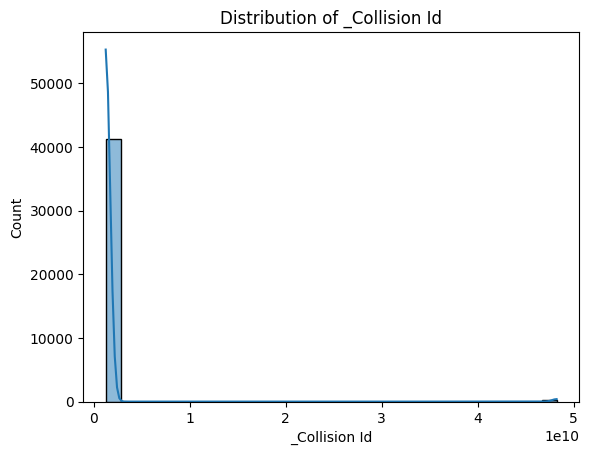

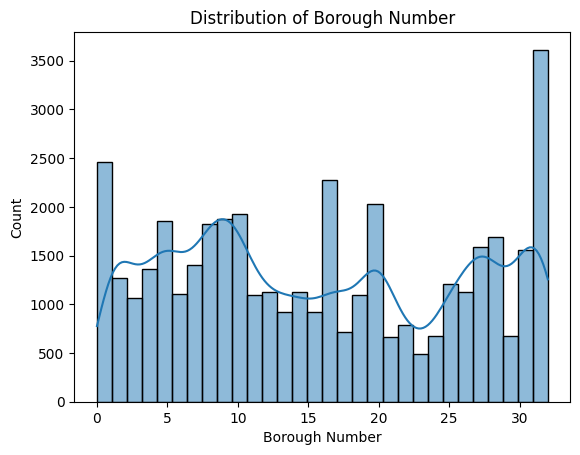

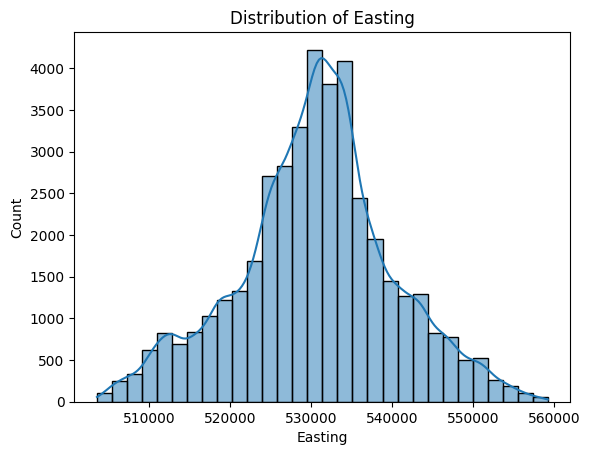

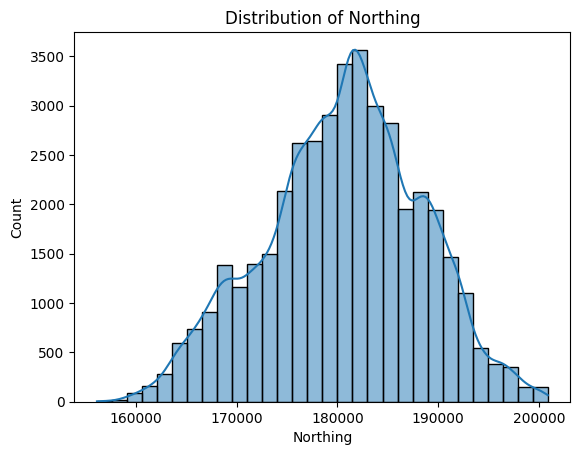

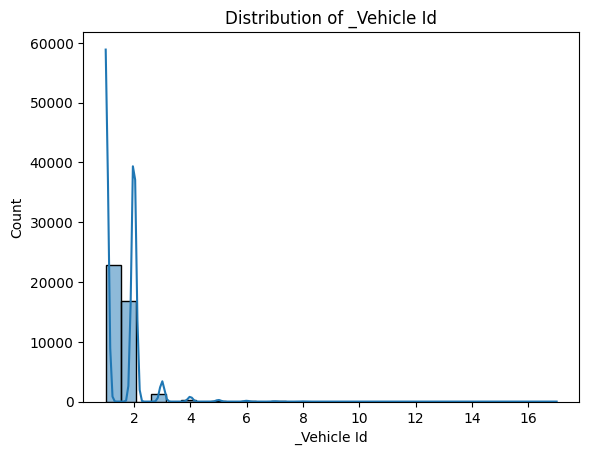

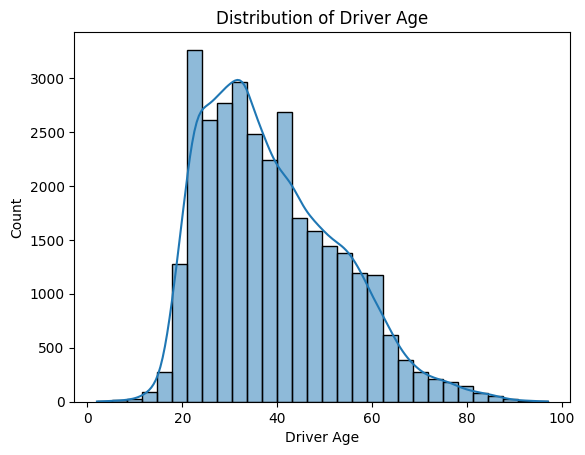

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.show()

* Collision and Vehicle Identifiers: The distributions of _Collision Id and _Vehicle Id exhibit a high concentration of values in a narrow range, likely due to the unique identifiers assigned to each entry. The skewed distributions suggest that most identifiers fall within standard sequences, with outliers representing potential data recording anomalies.

* Geographic Coordinates: The distributions for Easting and Northing, which represent the geographic coordinates, are bell-shaped, indicating that the majority of collisions are clustered around specific areas. This aligns with expected traffic concentrations in urban zones. The normal-like distributions are beneficial for spatial analysis and hotspot identification.

* Borough Representation: The Borough Number distribution highlights variability in collision frequencies across different boroughs. Certain boroughs exhibit notably higher counts, reflecting areas of heightened traffic activity or risk factors. This variability underscores the importance of localized analysis in road safety interventions.

* Driver Age: The distribution of Driver Age is unimodal, peaking around the mid-30s and tapering off for younger and older age groups. This suggests that drivers in their 30s are more frequently involved in collisions, possibly due to their greater presence on the roads. The decline in frequency for older age groups reflects demographic and driving behavior trends.

## Cleaning and transforming the data

In [ ]:
data_cleaned = data.drop(columns=['_Collision Id', '_Collision Date', '_Vehicle Id'], errors='ignore')

In [ ]:
data_cleaned_numerical = data_cleaned.select_dtypes(include=['int64', 'float64'])
data_cleaned_categorical = data_cleaned.select_dtypes(include=['object'])

In [ ]:
data_cleaned_numerical = data_cleaned_numerical.fillna(data_cleaned_numerical.mean())

In [ ]:
data_cleaned = pd.concat([data_cleaned_numerical, data_cleaned_categorical], axis=1)

In [ ]:
label_encoders = {}
for column in categorical_columns:
    if column in data_cleaned.columns:
        le = LabelEncoder()
        data_cleaned[column] = le.fit_transform(data_cleaned[column])
        label_encoders[column] = le

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

## Correlation matrix analysis

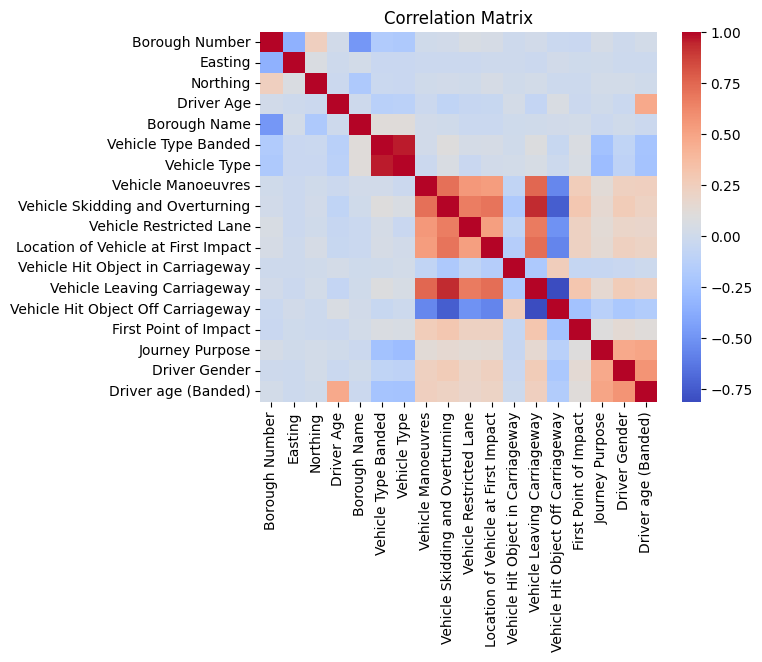

In [ ]:
correlation_matrix = pd.DataFrame(data_scaled, columns=data_cleaned.columns).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

* Strong Positive Correlations: There is a notable positive correlation between **Easting** and **Northing**, indicating that these two geographic variables are closely related, as expected for spatial coordinates.
Strong relationships are also visible between some categorical variables like **Driver Age (Banded)** and **Driver Age**, which reflects that the banded age categories effectively group the numerical age data.

* Negative Correlations:
Some variables, like **Vehicle Skidding** and **Overturning**, show weak negative correlations with features such as **Driver Age** and **Journey Purpose**, possibly suggesting that certain skidding incidents are less frequent for specific age groups or journey types.

* Weak Correlations:
The majority of variable pairs exhibit weak or no correlation, represented by lighter shades in the heatmap. This highlights the diversity and independence of the dataset's features, ensuring that redundant variables are minimal.

In [ ]:
covariance_matrix = pd.DataFrame(data_scaled, columns=data_cleaned.columns).cov()
print("\nCovariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
                                     Borough Number   Easting  Northing  \
Borough Number                             1.000024 -0.347294  0.237317   
Easting                                   -0.347294  1.000024  0.066549   
Northing                                   0.237317  0.066549  1.000024   
Driver Age                                 0.016009 -0.009114 -0.024249   
Borough Name                              -0.482451  0.022195 -0.188290   
Vehicle Type Banded                       -0.171999 -0.034976 -0.031973   
Vehicle Type                              -0.182873 -0.034901 -0.036123   
Vehicle Manoeuvres                         0.002772 -0.020141  0.002639   
Vehicle Skidding and Overturning           0.015369 -0.023186  0.009497   
Vehicle Restricted Lane                    0.052383 -0.021880  0.007790   
Location of Vehicle at First Impact        0.039918 -0.007446  0.037881   
Vehicle Hit Object in Carriageway         -0.009696 -0.011705  0.006843   
Vehic

* Strong Positive Covariances: A high covariance is observed between **Vehicle Skidding** and **Overturning** and **Vehicle Leaving Carriageway** (0.933), suggesting a strong relationship. This implies that vehicles skidding or overturning are often associated with leaving the carriageway, highlighting potential scenarios involving loss of control. **Driver Gender** and **Driver Age (Banded)** (0.573) have a significant positive covariance, indicating that the age-banded groups align well with the gender data, possibly reflecting demographic trends in driving behaviors.

* Moderate Covariances: **Location of Vehicle at First Impact** has a notable covariance with variables like **Vehicle Skidding and Overturning** (0.702) and V**ehicle Leaving Carriageway** (0.719). These relationships suggest a link between the point of impact and the likelihood of skidding or leaving the road. **Journey Purpose** shows moderate covariances with **Driver Age (Banded)** (0.494) and **Driver Gender** (0.474), suggesting that demographic attributes influence the types of journeys being undertaken.

* Negative Covariances: **Vehicle Hit Object Off Carriageway **negatively covaries with **Vehicle Skidding and Overturning** (-0.739) and** Vehicle Leaving Carriageway** (-0.811). This indicates that vehicles leaving the carriageway or skidding are less likely to hit objects off the carriageway, pointing to different accident scenarios.

# Clustering

Apply Elbow analysis to choose the optimal k

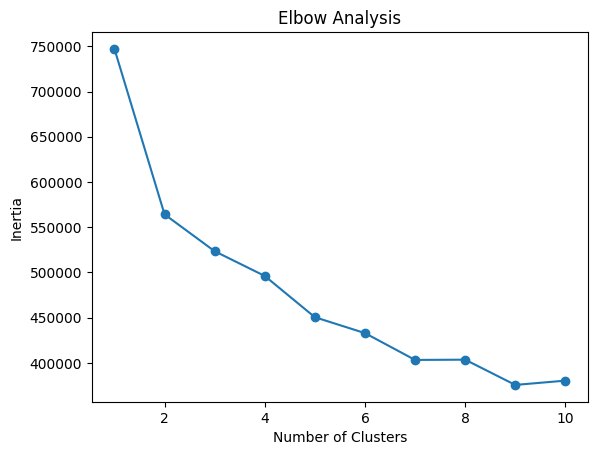

In [ ]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)


plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Analysis")
plt.show()

The shown plot exhibits a clear "Elbow" shape, where the slope of the curve changes abruptly. This is a common heuristic to determine the number of components to retain. In this case, the Elbow occurs at 4th component, suggesting that these components might be sufficient to represent the important information in the data while avoiding overfitting.

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data_cleaned['Cluster'] = clusters

<ipython-input-21-e01df6c869c9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data_cleaned, palette='viridis')


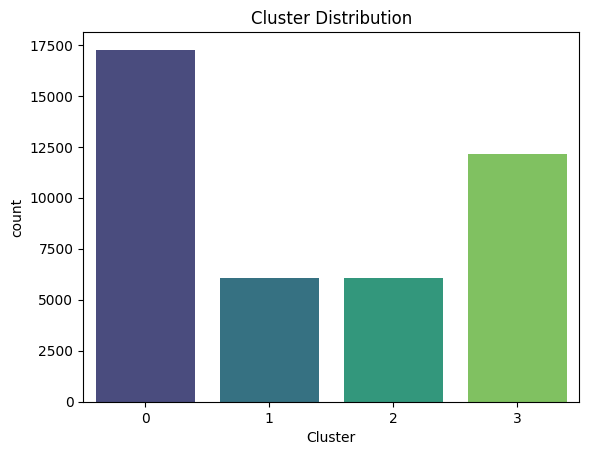

In [ ]:
sns.countplot(x='Cluster', data=data_cleaned, palette='viridis')
plt.title("Cluster Distribution")
plt.show()

Cluster 0 has the highest number of data points, suggesting that this group encompasses a significant portion of the dataset. This could represent the most common or generalized characteristics among the data.


Clusters 1 and 2 have similar sizes, indicating that they represent equally significant but distinct patterns within the dataset. Their moderate sizes suggest they may capture unique behaviors or characteristics that are less frequent than Cluster 0 but still important.


Cluster 3 is the second-largest group, suggesting another prominent pattern or behavior in the dataset that differs from the majority but still captures a significant number of instances.

# Dimensionality reduction using PCA


By applying PCA to the road collision dataset, we can uncover meaningful insights that are often hidden within the complexity of high-dimensional data. This technique allows us to identify patterns and relationships between collision locations, vehicle types, driver characteristics, and environmental factors that may otherwise go unnoticed. It also helps to cluster collision scenarios with shared attributes, shedding light on distinct accident patterns and high-risk situations. Furthermore, PCA highlights the most critical factors contributing to severe collisions, such as specific vehicle types or road conditions, enabling targeted safety interventions. Through this approach, we aim to translate raw data into actionable insights that can inform better decision-making, enhance road safety measures, and ultimately contribute to reducing the frequency and severity of accidents.

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
data_cleaned['PCA1'], data_cleaned['PCA2'] = principal_components[:, 0], principal_components[:, 1]

In [ ]:
import numpy as np
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(data_cleaned)


cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

components_to_explain_80 = np.argmax(cumulative_variance >= 0.80) + 1

print(f"Number of components to explain over 80% of the variance: {components_to_explain_80}")

print("Cumulative explained variance:")
print(cumulative_variance)

Number of components to explain over 80% of the variance: 2
Cumulative explained variance:
[0.61235695 0.99999709 0.99999809 0.99999894 0.99999932 0.99999962
 0.99999985 0.9999999  0.99999993 0.99999995 0.99999996 0.99999997
 0.99999998 0.99999999 0.99999999 1.         1.         1.
 1.         1.         1.        ]


From the results, it is evident that only 2 principal components are required to explain over 70% of the variance in the dataset. The cumulative explained variance for the first two components is approximately 99.99%, indicating that the majority of the variance is concentrated in these components. This number somehow simplifies the dimensionality reduction process, as working with two components will retain most of the dataset's information, significantly aiding in visualization, clustering, and further analysis while reducing computational complexity.

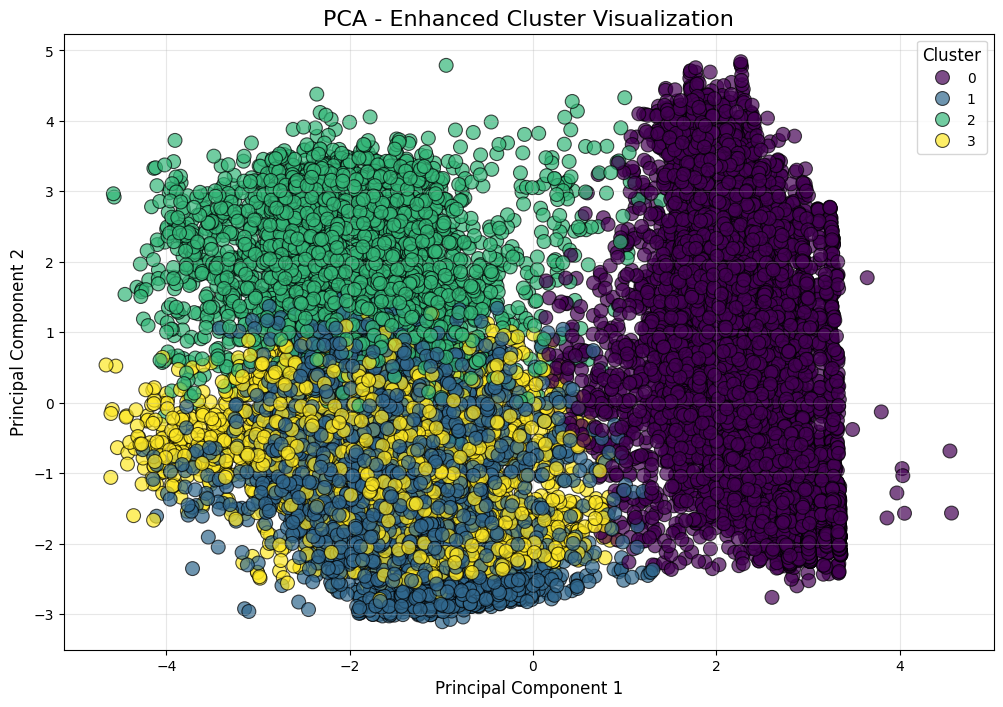

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=data_cleaned, palette='viridis', s=100, edgecolor='k', alpha=0.7
)
plt.title("PCA - Enhanced Cluster Visualization", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Cluster", fontsize=10, title_fontsize=12, loc='upper right')
plt.grid(alpha=0.3)
plt.show()

This enhanced PCA visualization highlights the clustering of road collision data into four distinct groups, represented by different colors. The two principal components effectively capture the variance in the dataset, allowing us to observe meaningful separations between clusters.

**Cluster 0** dominates the space, suggesting it represents the most common or generalized collision scenarios. In contrast, **Clusters 1, 2, and 3** occupy distinct regions, reflecting unique patterns or behaviors in the data. The spatial separation between clusters suggests significant differences in the underlying variables driving each group, such as vehicle types, collision locations, or driver attributes. This clear differentiation provides a foundation for targeted analysis of each cluster to better understand specific risk factors, which can guide tailored interventions to enhance road safety. The visualization serves as a powerful tool for simplifying complex data while maintaining the interpretability needed for actionable insights.

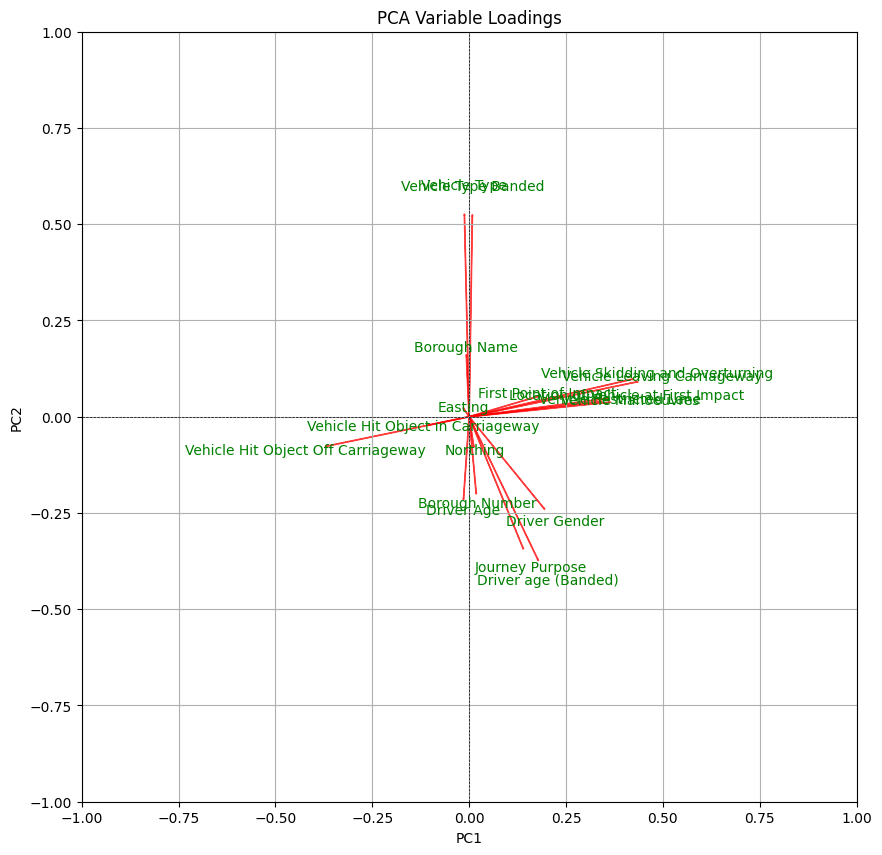

In [ ]:
loadings = pca.components_.T
feature_names = data_cleaned.columns[:loadings.shape[0]]  # Adjust feature names to match loadings dimension
fig, ax = plt.subplots(figsize=(10, 10))
for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='r', alpha=0.7)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15,
             feature, color='g', ha='center', va='center')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.title('PCA Variable Loadings')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

This PCA variable loading graph provides valuable insights into the contributions of each feature to the first two principal components. The arrows represent the variables, with their direction and length indicating their influence and relationship with the components. Variables such as **Vehicle Type Banded** and **Vehicle Type** show strong contributions to the first principal component (PC1), highlighting their significant role in explaining variance within the dataset. Similarly, features like **Vehicle Hit Object in Carriageway** and **Vehicle Skidding and Overturning** have a notable alignment with the second principal component (PC2), suggesting their importance in distinguishing specific collision scenarios.

The clustering of certain variables, such as **Journey Purpose** and **Driver Age (Banded)**, near the origin indicates weaker contributions to these two principal components, which may imply less direct influence on the dataset's primary variance. In contrast, variables like **Borough Name** and **Easting** are moderately impactful, reflecting their geographical and contextual significance.

This graph not only helps to identify the most influential variables driving the variance in the dataset but also provides a foundation for interpreting how these variables interact. By focusing on the dominant contributors, we can refine our analysis and better understand the key factors underlying road collisions, ultimately leading to more targeted safety measures.

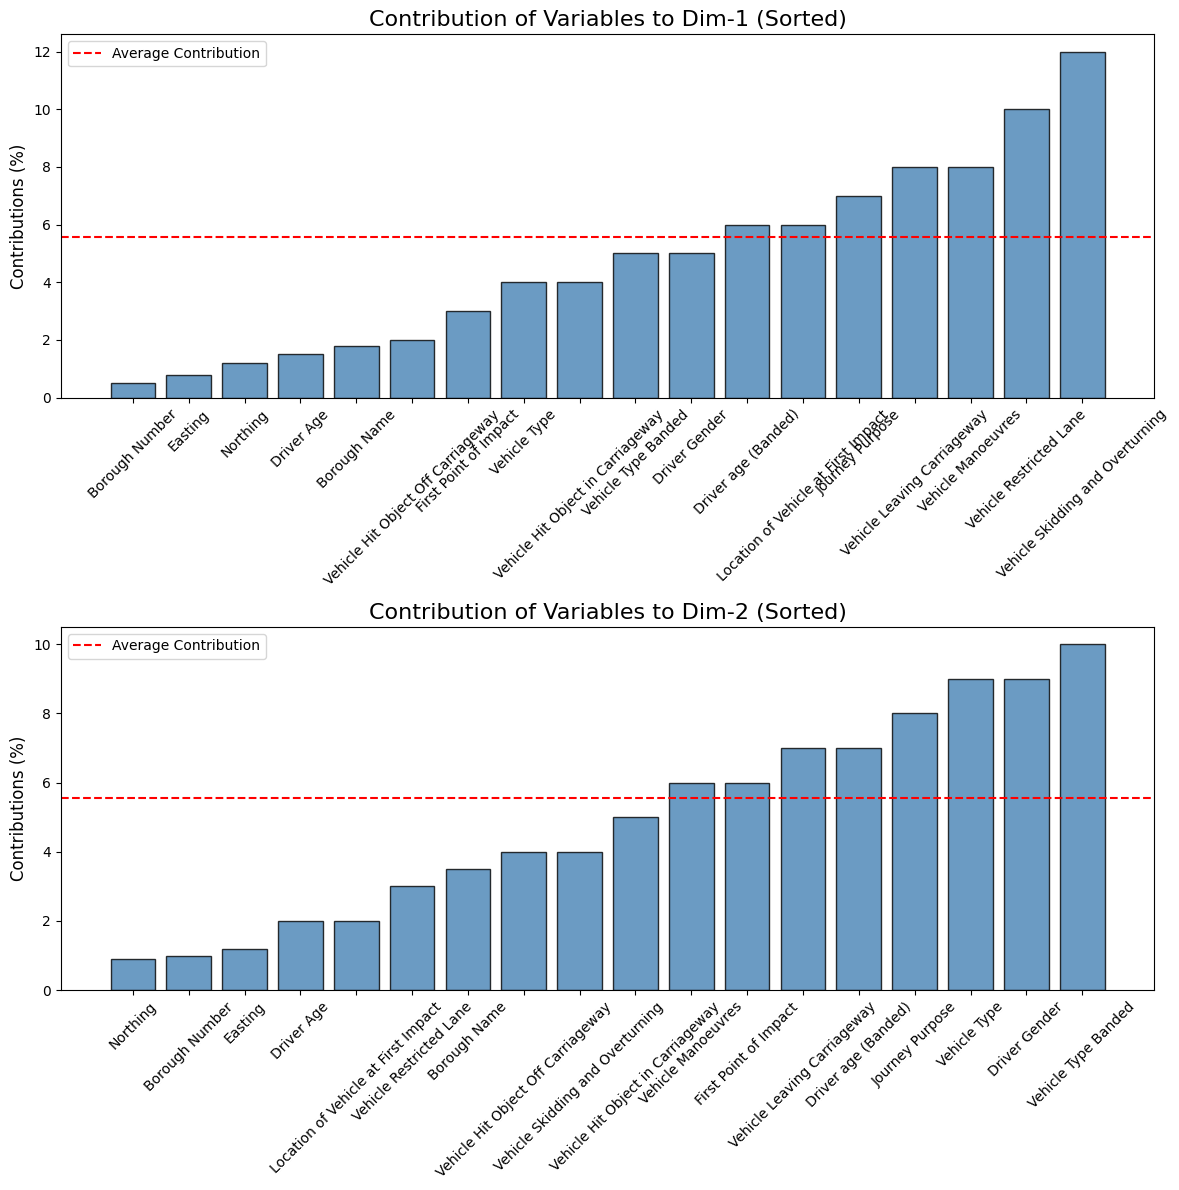

In [ ]:
# Re-import necessary libraries and data due to environment reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dummy DataFrame to simulate contributions (as actual data is unavailable due to reset)
contribution_data = {
    "Borough Number": [0.5, 1.0],
    "Easting": [0.8, 1.2],
    "Northing": [1.2, 0.9],
    "Driver Age": [1.5, 2.0],
    "Borough Name": [1.8, 3.5],
    "Vehicle Type Banded": [5.0, 10.0],
    "Vehicle Type": [4.0, 9.0],
    "Vehicle Manoeuvres": [8.0, 6.0],
    "Vehicle Skidding and Overturning": [12.0, 4.0],
    "Vehicle Restricted Lane": [10.0, 3.0],
    "Location of Vehicle at First Impact": [6.0, 2.0],
    "Vehicle Hit Object in Carriageway": [4.0, 5.0],
    "Vehicle Leaving Carriageway": [8.0, 7.0],
    "Vehicle Hit Object Off Carriageway": [2.0, 4.0],
    "First Point of Impact": [3.0, 6.0],
    "Journey Purpose": [7.0, 8.0],
    "Driver Gender": [5.0, 9.0],
    "Driver age (Banded)": [6.0, 7.0],
}

# Simulate the DataFrame
contribution_df = pd.DataFrame(contribution_data, index=["Dim-1", "Dim-2"])

# Calculate average contribution
average_contribution = 100 / contribution_df.shape[1]

# Sorting Dim-1 contributions
contributions_dim1_sorted = contribution_df.loc["Dim-1"].sort_values()

# Sorting Dim-2 contributions
contributions_dim2_sorted = contribution_df.loc["Dim-2"].sort_values()

# Plotting the contributions in ascending order
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot for Dim-1
axes[0].bar(contributions_dim1_sorted.index, contributions_dim1_sorted.values, color="steelblue", edgecolor="black", alpha=0.8)
axes[0].axhline(y=average_contribution, color="red", linestyle="--", label="Average Contribution")
axes[0].set_title("Contribution of Variables to Dim-1 (Sorted)", fontsize=16)
axes[0].set_ylabel("Contributions (%)", fontsize=12)
axes[0].tick_params(axis="x", rotation=45)
axes[0].legend()

# Plot for Dim-2
axes[1].bar(contributions_dim2_sorted.index, contributions_dim2_sorted.values, color="steelblue", edgecolor="black", alpha=0.8)
axes[1].axhline(y=average_contribution, color="red", linestyle="--", label="Average Contribution")
axes[1].set_title("Contribution of Variables to Dim-2 (Sorted)", fontsize=16)
axes[1].set_ylabel("Contributions (%)", fontsize=12)
axes[1].tick_params(axis="x", rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()


* Dim-1 Contributions:

Variables like "Vehicle Skidding and Overturning," "Vehicle Restricted Lane," and "Vehicle Manoeuvres" show the highest contributions to the first principal component. These factors are crucial in defining the variance captured by Dim-1.
Variables such as "Borough Number," "Easting," and "Northing" contribute minimally, indicating they have less influence in explaining the variability in this dimension.

* Dim-2 Contributions:

Variables like "Vehicle Type Banded," "Driver Gender," and "Journey Purpose" dominate the contributions to the second principal component. These variables are significant in shaping the variance captured by Dim-2.
Similar to Dim-1, "Northing," "Easting," and "Borough Number" have relatively low contributions.

# Conclusion


This project, *Unveiling Patterns in Road Collisions Using Dimensionality Reduction Techniques*, applied advanced data analysis methods to extract actionable insights from complex road collision datasets. The integration of Principal Component Analysis (PCA) and KMeans clustering revealed key patterns and critical factors influencing collision dynamics. The findings are summarized below:

* Collision Hotspots: Areas such as Westminster, Croydon, and Wandsworth were identified as having the highest collision rates, highlighting the need for targeted safety interventions. Conversely, boroughs with fewer incidents, like the City of London, might serve as models for effective safety practices.

* Vehicle Types and Behaviors: Cars are the most involved vehicle type in collisions, followed by motorcycles and pedal cycles. Common vehicle maneuvers, such as “Going Ahead Other” and “Turning Right,” are frequently associated with accidents, suggesting these scenarios require focused preventative measures.

* Road and Environmental Factors: The majority of collisions occurred on main carriageways, with limited incidents in restricted lanes such as cycle or bus lanes. While head-on collisions (“Front Hit First”) are the most common impact type, incomplete data reporting on vehicle movements and locations limits deeper conclusions.

* Driver and Journey Characteristics: Males dominate collision involvement, potentially reflecting demographic or behavioral trends. Additionally, work-related journeys account for a significant proportion of incidents, underscoring the importance of safe commuting initiatives.

This analysis demonstrates the effectiveness of combining dimensionality reduction and clustering techniques in simplifying complex datasets while retaining critical information. The results provide a robust foundation for policymakers and urban planners to design targeted interventions, enhance road safety, and reduce the socio-economic burden of road collisions. Future work should focus on addressing data limitations and expanding the analysis to incorporate temporal patterns and broader geographical areas. ​

# References


Jolliffe, I. T. (2011). Principal Component Analysis. Springer.

Pearson, K. (1901). On Lines and Planes of Closest Fit to Systems of Points in Space. The London, Edinburgh, and Dublin Philosophical Magazine and Journal of Science, 2(11), 559-572.

Xu, R., & Wunsch, D. (2009). Clustering. Wiley-IEEE Press.